In [87]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


from dtreeviz.trees import *

sns.set_context("talk")
sns.set_theme()

In [2]:
def percentage_above_bars(ax, hue=False, size=11, color="grey"):
    if hue == False:
        all_heights = [[p.get_height() for p in bars] for bars in ax.containers][0]
    if hue == True:
        all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            if hue == False:
                total = np.nansum(all_heights)
            if hue == True:
                total = np.nansum([xgroup[i] for xgroup in all_heights])
            percentage = f'{(100 * p.get_height() / total) :.0f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), 
                        size=size, 
                        ha='center', 
                        va='bottom',
                        color=color)
            
def percentage_above_bars_reversed(ax, hue=False, size=11, color="grey"):
    if hue == False:
        all_heights = [[p.get_width() for p in bars] for bars in ax.containers][0]
    if hue == True:
        all_heights = [[p.get_width() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            if hue == False:
                total = np.nansum(all_heights)
            if hue == True:
                total = np.nansum([xgroup[i] for xgroup in all_heights])
            percentage = f'{(100 * p.get_width() / total) :.0f}%'
            ax.annotate(percentage, (p.get_width() + p.get_height(), 
                                     p.get_y() + p.get_height() / 2 ), #(p.get_x() + p.get_height() / 2, p.get_width())
                        size=size, 
                        ha='left', 
                        va='center',
                        color=color)
            
def percentage_above_bars_value_counts(ax, columns, hue=False, size=11, color="grey"):
    if hue == False:
        all_heights = data[columns].value_counts()
    for bars in ax.containers:
        for i, p in enumerate(bars):
            if hue == False:
                total = np.nansum(all_heights)
            if hue == True:
                total = np.nansum([xgroup[i] for xgroup in all_heights])
            percentage = f'{(100 * p.get_height() / total) :.0f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), 
                        size=size, 
                        ha='center', 
                        va='bottom',
                        color=color)

In [4]:
from AlTech.Visualization.Categorical import categorical_univariate_countplot

In [5]:
data = pd.read_csv("glass.csv")

In [6]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
data.describe().T.loc[:, ['min', 'mean', '50%', 'max', 'std']].rename(columns={"50%": "median"})

,min,mean,median,max,std
RI,1.51115,1.518365,1.51768,1.53393,0.003037
Na,10.73000,13.407850,13.30000,17.38000,0.816604
Mg,0.00000,2.684533,3.48000,4.49000,1.442408
Al,0.29000,1.444907,1.36000,3.50000,0.499270
Si,69.81000,72.650935,72.79000,75.41000,0.774546
K,0.00000,0.497056,0.55500,6.21000,0.652192
Ca,5.43000,8.956963,8.60000,16.19000,1.423153
Ba,0.00000,0.175047,0.00000,3.15000,0.497219
Fe,0.00000,0.057009,0.00000,0.51000,0.097439
Type,1.00000,2.780374,2.00000,7.00000,2.103739


''

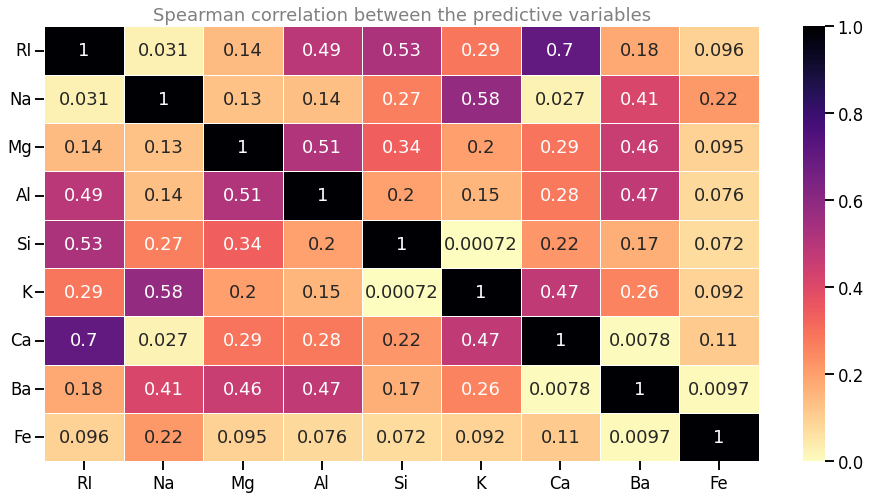

In [11]:
plt.figure(figsize=(16, 8))
sns.heatmap(abs(data.drop(columns="Type").corr(method="spearman")), annot=True, cmap="magma_r",
            cbar_kws={"orientation": "vertical"}, center=None, vmin=-0.0, vmax=1.0,linewidths=1.0
                )
plt.yticks(rotation=0)
plt.title("Spearman correlation between the predictive variables", color="grey")
;

In [13]:
dic_type = {1: "Building Window \n(processed)",
            2: "Building Window \n(non processed)",
            3: "Vehicule Window \n(processed)",
            5: "Container",
            6: "Tableware",
            7: "Headlamp"}

In [134]:
dic_type_2 = {1: "1: Building Window (processed)",
            2: "2: Building Window (non processed)",
            3: "3: Vehicule Window (processed)",
            5: "5: Container",
            6: "6: Tableware",
            7: "7: Headlamp"}

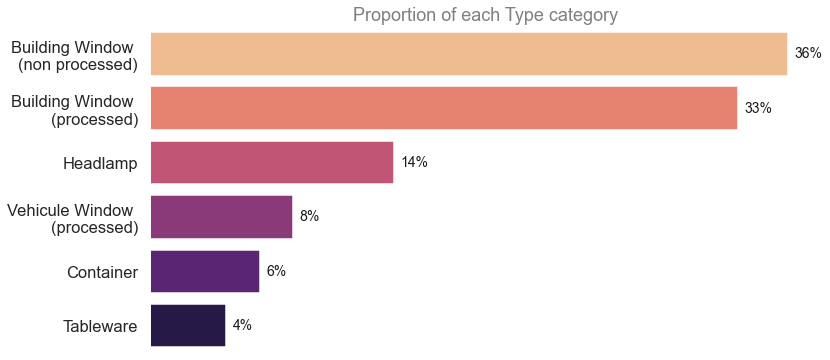

In [139]:
sns.set_context("talk")


fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.set(facecolor="white")            

sns.countplot(data=data,
              y="Type",
              palette="magma_r",
              order=data["Type"].value_counts().index,
              alpha=1)

plt.title("Proportion of each Type category", color="grey", )
plt.ylabel("")
plt.xlabel("")
plt.yticks(range(6), [dic_type[i] for i in data["Type"].value_counts().index], rotation=0)
plt.tick_params(labelbottom=False, )

percentage_above_bars_reversed(ax=ax, color="k", size=14)

In [15]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [16]:
# sns.pairplot(data, hue="Type")

In [140]:
X = data.drop(columns=["Type"])
y = data["Type"]

In [141]:
RANDOM_STATE = 42

In [142]:
from imblearn.over_sampling import RandomOverSampler#, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [143]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [145]:
X_train, X_validation, y_train, y_validation = train_test_split(X, 
                                                                y, 
                                                                test_size=0.2,
                                                                random_state=RANDOM_STATE)

In [146]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [147]:
ros = RandomOverSampler(random_state=RANDOM_STATE)

In [148]:
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)
X_validation_scaled = scaler.transform(X_validation)

In [149]:
print(X_resampled.shape)
print(X_train.shape)
print(X_validation.shape)
print(y_resampled.shape)
print(y_validation.shape)

(372, 9)
(171, 9)
(43, 9)
(372,)
(43,)


In [173]:
dico_data = {"Categories": [dic_type_2[i] for i in data["Type"].value_counts().index],
             "Before": y_train.value_counts().reset_index(drop=True),
             "After": y_resampled.value_counts().reset_index(drop=True)
             }

In [174]:
pd.DataFrame(dico_data).sort_values("Before", ascending=False).reset_index(drop=True)

,Categories,Before,After
0,2: Building Window (non processed),62,62
1,1: Building Window (processed),59,62
2,7: Headlamp,21,62
3,3: Vehicule Window (processed),14,62
4,5: Container,9,62
5,6: Tableware,6,62


In [93]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_resampled, y_resampled)

predictions = model.predict(X_validation_scaled, )

In [100]:
dataframe_features_importance = pd.DataFrame({"features_name": X.columns,
                                              "feature_importance": model.feature_importances_})

In [114]:
val = list(dataframe_features_importance["features_name"][dataframe_features_importance["feature_importance"].sort_values(ascending=False).index])

In [115]:
val

['Mg', 'K', 'Na', 'RI', 'Al', 'Ca', 'Ba', 'Si', 'Fe']

In [119]:
print(classification_report(y_validation, predictions))

              precision    recall  f1-score   support

           1       0.90      0.82      0.86        11
           2       0.92      0.86      0.89        14
           3       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.91        43
   macro avg       0.91      0.95      0.92        43
weighted avg       0.91      0.91      0.91        43



''

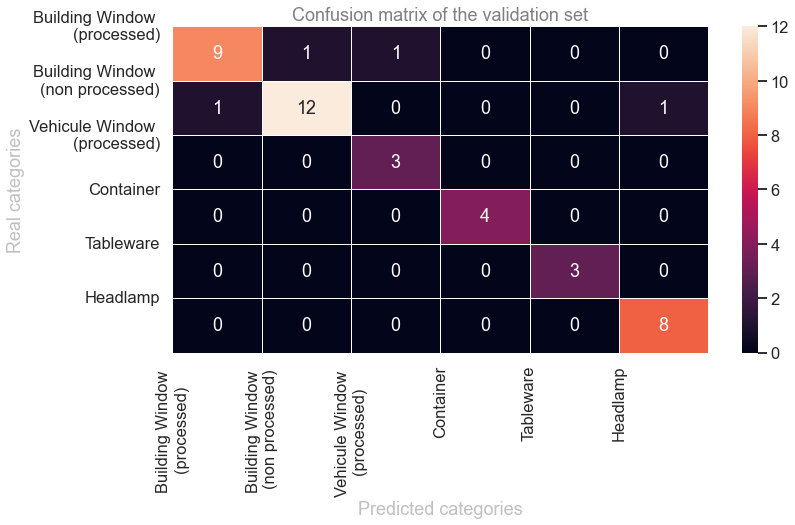

In [128]:
plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(y_validation, predictions, 
                        rownames=["Catégories réelles"],
                        colnames=["Catégories prédites"],
                    ),
            annot=True,
            fmt="d", linewidths=1,
            cbar_kws=)
plt.yticks(range(6), dic_type.values(), va="center",  rotation=0)
plt.xticks(range(6), dic_type.values(), ha="center",  rotation=90)

plt.ylabel("Real categories", color="silver")
plt.xlabel("Predicted categories", color="silver")

plt.title("Confusion matrix of the validation set", color="grey")
;

In [32]:
import shap

In [33]:
explainer = shap.TreeExplainer(model, data=X_validation_scaled, feature_names=X.columns)
shap_values = explainer.shap_values(X_validation_scaled, check_additivity=False)

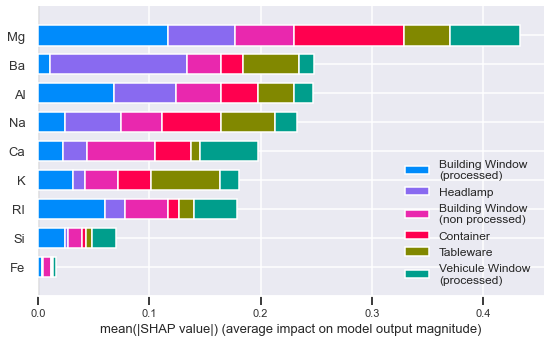

In [118]:
shap.summary_plot(shap_values, X_validation_scaled, feature_names=X.columns,
                  class_names=list(dic_type.values()),
                  title="Training set", 
                  )
